# Part 1: TD LEARNING

Hwajin Shin, Lucia Gonzalez Anton

Part 1.1: Recreate Figure 9.2 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

In [13]:
def td_leaning(alpha, stimuli, rewards, trials, steps):
    """
    Temporal Difference learning 

    Args:
        alpha (float): Learning rate (0 <= alpha <= 1).
        stimuli (array): Input stimuli signal
        rewards (array): Reward signal
        trials (float): Number of trials
        steps (float): Number of time points
    
    Returns:
        w (array): Weights (associations between stimuli and predictions) after learning.
        v (array): Prediction of reward
        delta_v (array): Change in predictions between consecutive time steps.
        delta (2D array): Temporal Difference (TD) errors across trials and time steps.
    """

    #Initialize arrays 
    v = np.zeros(steps) # prediction
    w = np.zeros(steps)  #  weights
    delta = np.zeros([trials, steps])  # prediction error: 2D array for trial x time
    delta_v = np.zeros(steps)  # delta v

    # Temporal difference learning: update predictions for each trial
    for n in (range(trials)): # range over number of trials
        for t in range(1, steps): # range over time point steps
            # compute the prediction v(t) as the weighted sum of past stimuli 
            # reversed slicing ensures that earlier stimuli have more influence when paired with the weights
            v[t] = (w[0:t] @ stimuli[t:0:-1])[0]

            # Compute the prediction difference
            delta_v[t-1] = v[t] - v[t-1]

            # Compute the prediction TD error for each time step
            delta[n, t] = rewards[t] + delta_v[t]

            # Weight update
            for tau in range(t):
                w[tau] += alpha * delta[n, t] * stimuli[t - tau]

    return w, v, delta_v, delta

In [14]:
# Define parameters to implement the TD learning function
trials = 2000
num_trials = np.arange(trials)
steps = 300
time_steps = np.arange(steps)
reward_time = 200
stimulus_time = 100
learning_rate = 0.1

v_before = np.zeros(len(time_steps)) # prediction array before learning
delta_v_before = np.zeros(len(time_steps)) # change in prediction array before learning

# Initialize stimulus array and set it to 1 at time step 100
u = np.zeros((len(time_steps), 1)) 
u[stimulus_time] = 1

# Initialize rewards array and set it to 2 at time step 200
r = np.zeros(len(time_steps)) 
r[reward_time] = 2

# The reward is a gaussian curve around time step 200
sigma = 5  # Standard deviation for Gaussian
r = gaussian_filter1d(r, sigma)

# Normalize to sum to 2
r *= 2 / np.sum(r)

# create an array for TD error before learning that is the same as the rewards

delta_before = r

In [15]:
# call the temporal difference learning function
w_after, v_after, delta_v_after, delta_after = td_leaning(learning_rate, u, r, trials, steps)

C:\Users\34600\AppData\Local\Temp\ipykernel_20340\4283202099.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


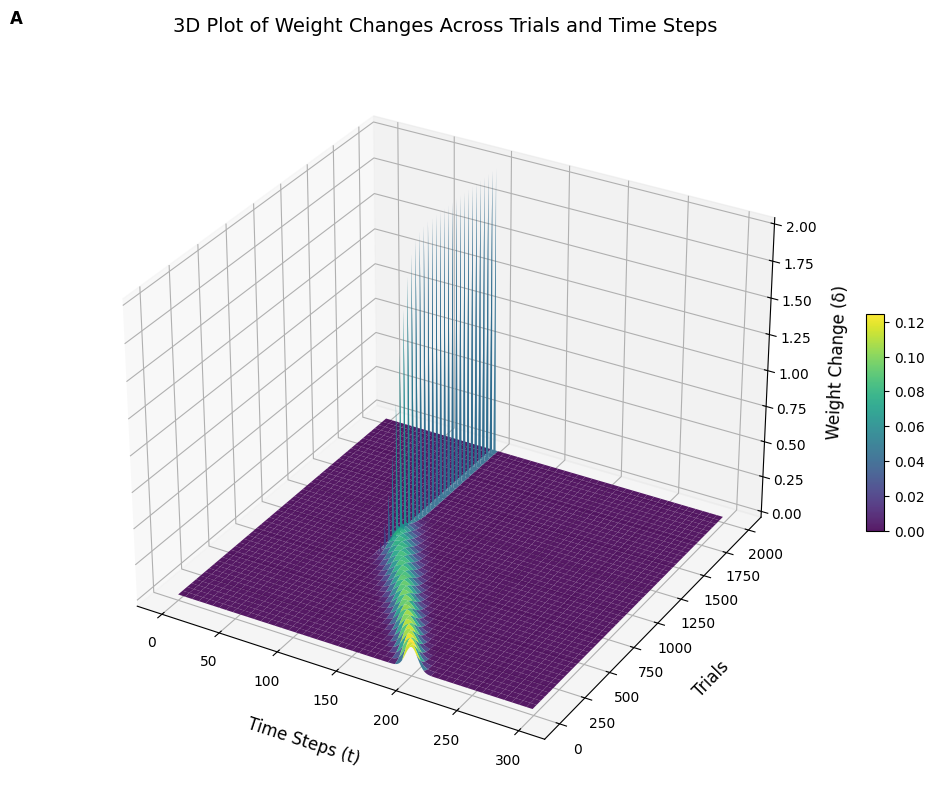

In [16]:
# 3D PLOT
# Create mesh grid for plotting
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Plot 3D surface with 'viridis' colormap
fig_a = plt.figure(figsize=(12, 8))  # Adjust size for better readability
ax1 = fig_a.add_subplot(111, projection='3d')

# Plotting with the 'viridis' colormap
surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

# Labels and formatting
ax1.set_xlabel('Time Steps (t)', fontsize=12, labelpad=15)
ax1.set_ylabel('Trials', fontsize=12, labelpad=15)
ax1.set_zlabel('Weight Change (δ)', fontsize=12, labelpad=10)

# Add colorbar for color mapping with a smaller size
cbar = fig_a.colorbar(surf, ax=ax1, shrink=0.3, aspect=12)  # Shrink and aspect ratio adjusted for smaller colorbar
#cbar.set_label('Weight Change (δ)', fontsize=12)

# Title and annotation
ax1.set_title('3D Plot of Weight Changes Across Trials and Time Steps', fontsize=14, pad=20)
ax1.text2D(-0.1, 1.05, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')

# Adjust view to center the plot
ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


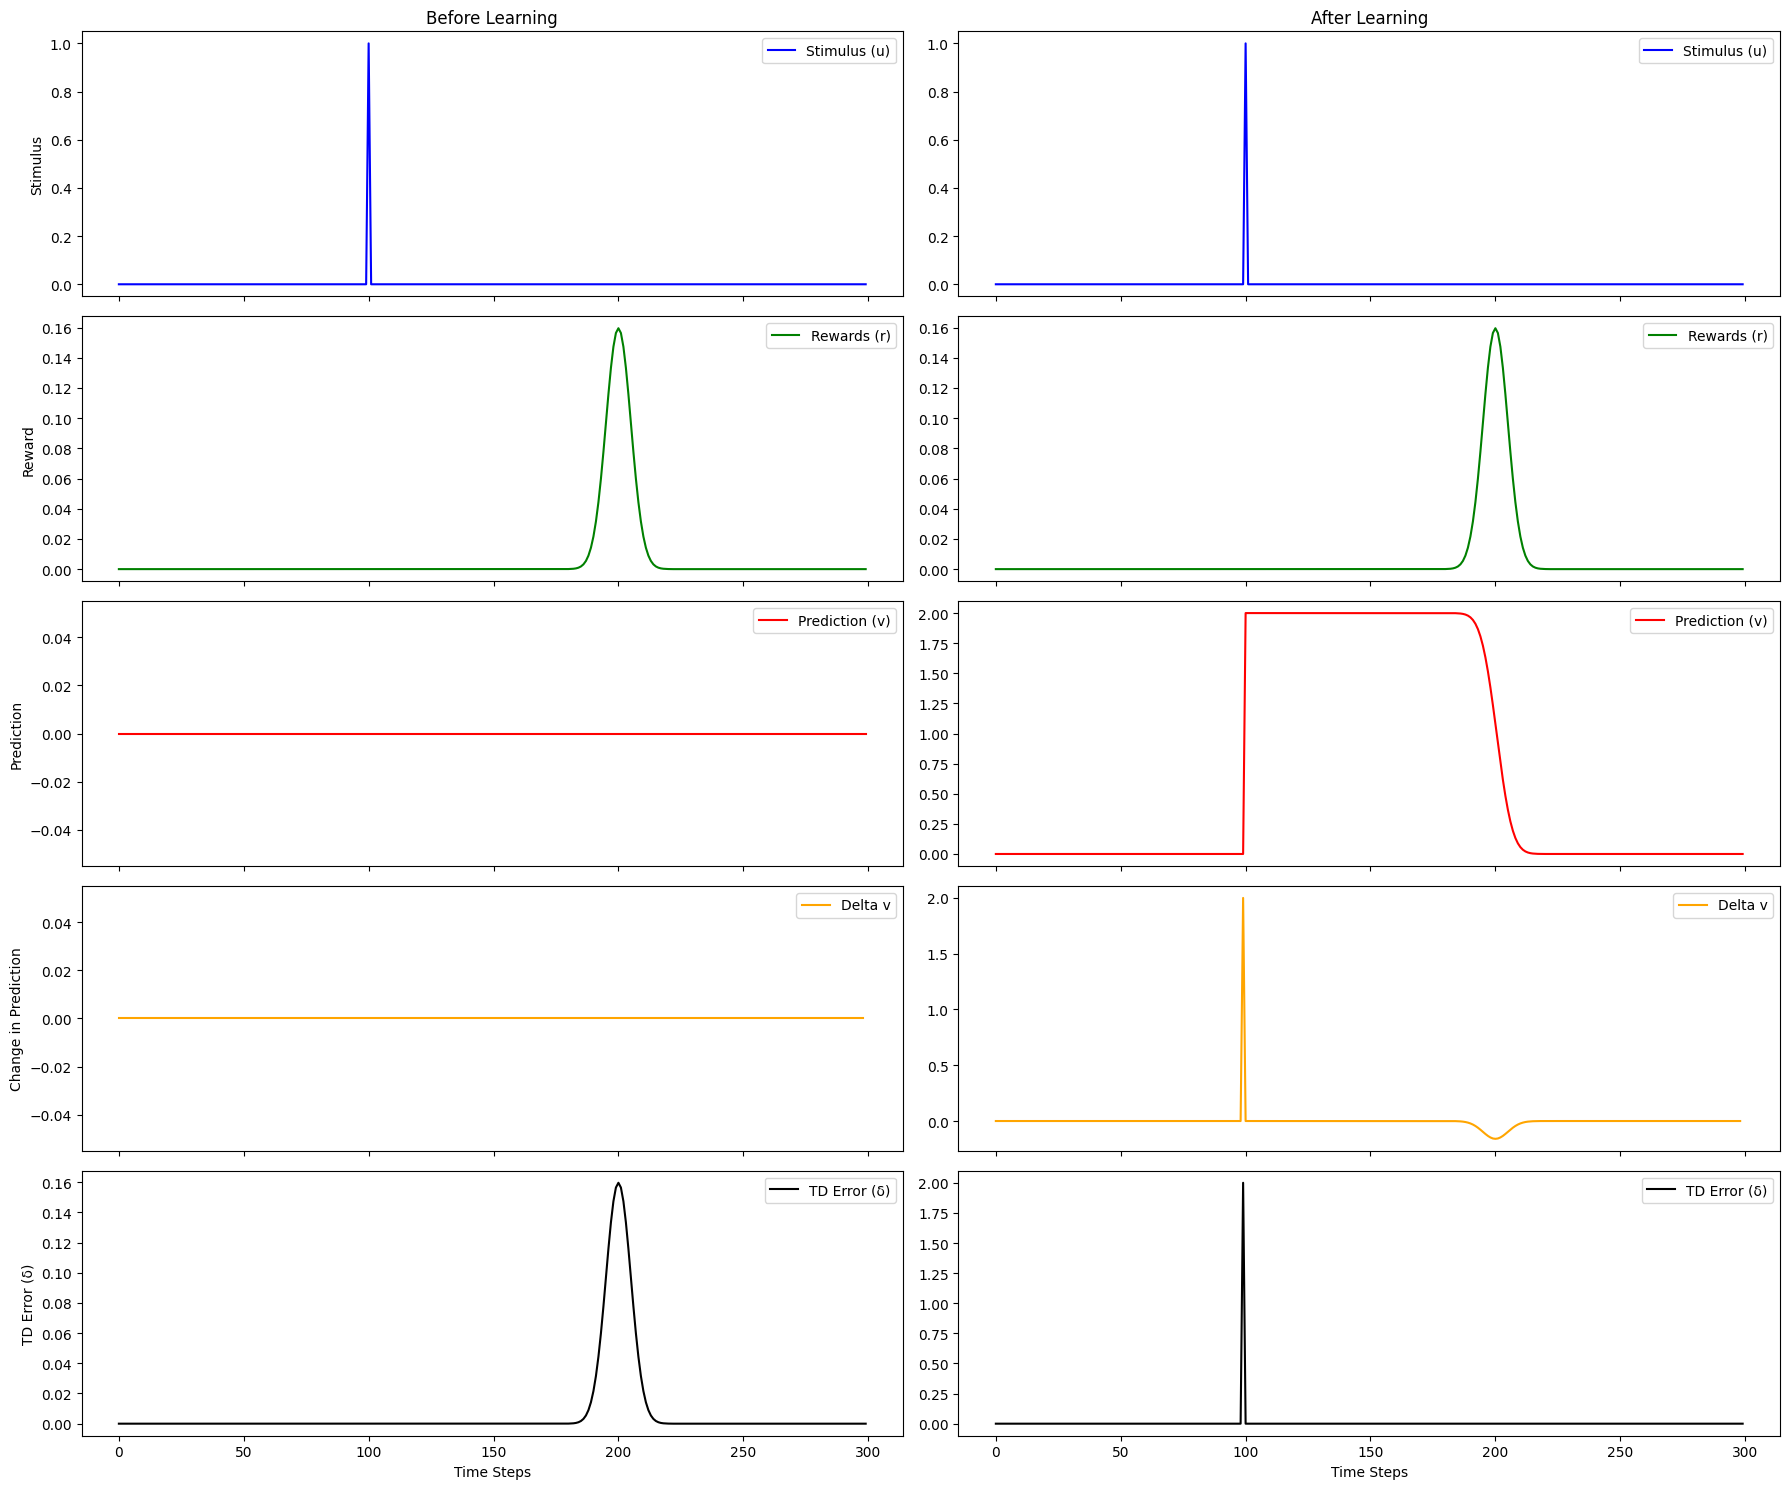

In [17]:
# 2D PLOT

# Create subplots: 5 rows and 2 columns (left: before learning, right: after learning)
fig, axs = plt.subplots(5, 2, figsize=(18, 15), sharex='col')

time_steps = np.arange(steps)

# ---- Stimulus (u) ----
# Before learning
axs[0, 0].plot(time_steps, u, label='Stimulus (u)', color='blue')
axs[0, 0].set_title('Before Learning')
axs[0, 0].set_ylabel('Stimulus')
axs[0, 0].legend()

# After learning
axs[0, 1].plot(time_steps, u, label='Stimulus (u)', color='blue')
axs[0, 1].set_title('After Learning')
axs[0, 1].legend()

# ---- Rewards (r) ----
# Before learning
axs[1, 0].plot(time_steps, r, label='Rewards (r)', color='green')
axs[1, 0].set_ylabel('Reward')
axs[1, 0].legend()

# After learning
axs[1, 1].plot(time_steps, r, label='Rewards (r)', color='green')
axs[1, 1].legend()

# ---- Predictions (v) ----
# Before learning
axs[2, 0].plot(time_steps, v_before, label='Prediction (v)', color='red')
axs[2, 0].set_ylabel('Prediction')
axs[2, 0].legend()

# After learning
axs[2, 1].plot(time_steps, v_after, label='Prediction (v)', color='red')
axs[2, 1].legend()

# ---- Change in Predictions (Delta v) ----
# Before learning
axs[3, 0].plot(time_steps[:-1], delta_v_before[:-1], label='Delta v', color='orange')
axs[3, 0].set_ylabel('Change in Prediction')
axs[3, 0].legend()

# After learning
axs[3, 1].plot(time_steps[:-1], delta_v_after[:-1], label='Delta v', color='orange')
axs[3, 1].legend()

# ---- Temporal Difference Error (Delta) ----
# Before learning: Plotting as a line (delta_before)
axs[4, 0].plot(time_steps, delta_before, label='TD Error (δ)', color='black')
axs[4, 0].set_ylabel('TD Error (δ)')
axs[4, 0].set_xlabel('Time Steps')
axs[4, 0].legend()

# After learning: Plotting as a line (delta_after)
axs[4, 1].plot(time_steps, delta_after[-1, :], label='TD Error (δ)', color='black')
axs[4, 1].set_xlabel('Time Steps')
axs[4, 1].legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()


Part 1.2: Experiment with parameters

A. Reward timing

C:\Users\34600\AppData\Local\Temp\ipykernel_20340\4283202099.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


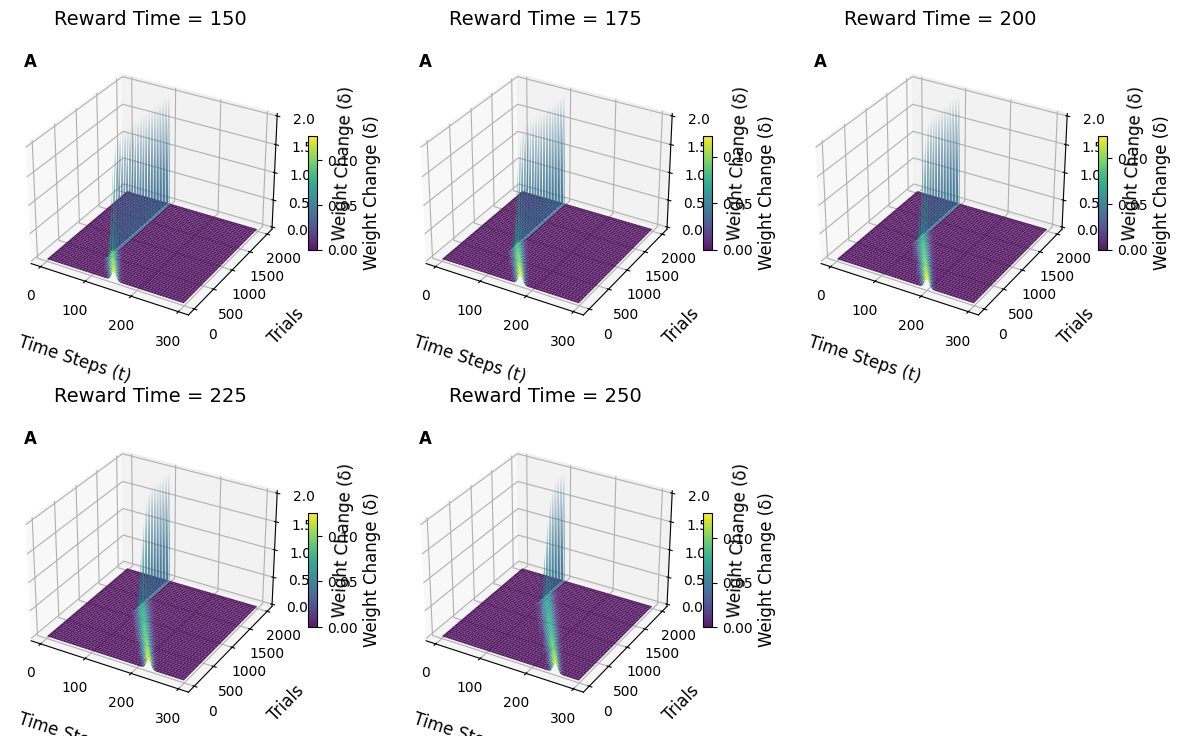

In [18]:
# Define the array of reward times to plot
reward_times_array = [150, 175, 200, 225, 250]  # Example reward times at which reward is given

# Initialize the figure
fig_r = plt.figure(figsize=(12, 8))  # Adjust size for better readability

# Plot 3D surface for each reward time in reward_times_array
for idx, reward_time in enumerate(reward_times_array):
    # Initialize rewards array and set it to 2 at the current reward_time
    r = np.zeros(len(time_steps)) 
    r[reward_time] = 2  # Reward at the given time step
    
    # Apply a Gaussian filter to simulate the spread of the reward over time
    sigma = 5  # Standard deviation for Gaussian
    r = gaussian_filter1d(r, sigma)
    
    # Normalize to sum to 2
    r *= 2 / np.sum(r)

    # Run the TD learning function for the current reward time
    w, v, delta_v, delta_after = td_leaning(learning_rate, u, r, trials, steps)  # Assuming td_leaning is defined
    
    # Create mesh grid for plotting based on the shape of delta_after
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

    # Create a new subplot for each reward time (using 2 rows, 3 columns)
    ax1 = fig_r.add_subplot(2, 3, idx+1, projection='3d')  # 2 rows, 3 columns

    # Plotting with the 'viridis' colormap
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

    # Labels and formatting
    ax1.set_xlabel('Time Steps (t)', fontsize=12, labelpad=15)
    ax1.set_ylabel('Trials', fontsize=12, labelpad=15)
    ax1.set_zlabel('Weight Change (δ)', fontsize=12, labelpad=10)

    # Add colorbar for color mapping with a smaller size
    cbar = fig_r.colorbar(surf, ax=ax1, shrink=0.3, aspect=12)  # Shrink and aspect ratio adjusted for smaller colorbar
    cbar.set_label('Weight Change (δ)', fontsize=12)  # Added label

    # Title and annotation
    ax1.set_title(f'Reward Time = {reward_time}', fontsize=14, pad=20)
    ax1.text2D(0.05, 0.95, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')  # Adjusted positioning

    # Adjust view to center the plot
    ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()  
plt.show()


Earlier Reward Times:

When the reward is applied earlier in the time steps, the TD errors (delta_after) will generally be higher early in the learning process.
This is because the reward has a strong influence on the weight updates early on, causing a large adjustment in weights.
The weight updates will likely have more pronounced changes right around the reward time, with a peak in the TD error corresponding to when the reward is applied.
After that, the impact of the reward diminishes as the weight updates converge.

Later Reward Times:

When the reward is applied later in the time steps, the TD errors will likely be smaller earlier in the learning process.
The weight updates will be influenced more strongly toward the end of the learning process, with a more concentrated peak in the TD error around the reward time.
The model will have had more time to adjust to the earlier stimuli, so you may observe smaller updates before the reward time and larger, more focused updates after it.

B. Learning rate

C:\Users\34600\AppData\Local\Temp\ipykernel_20340\4283202099.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


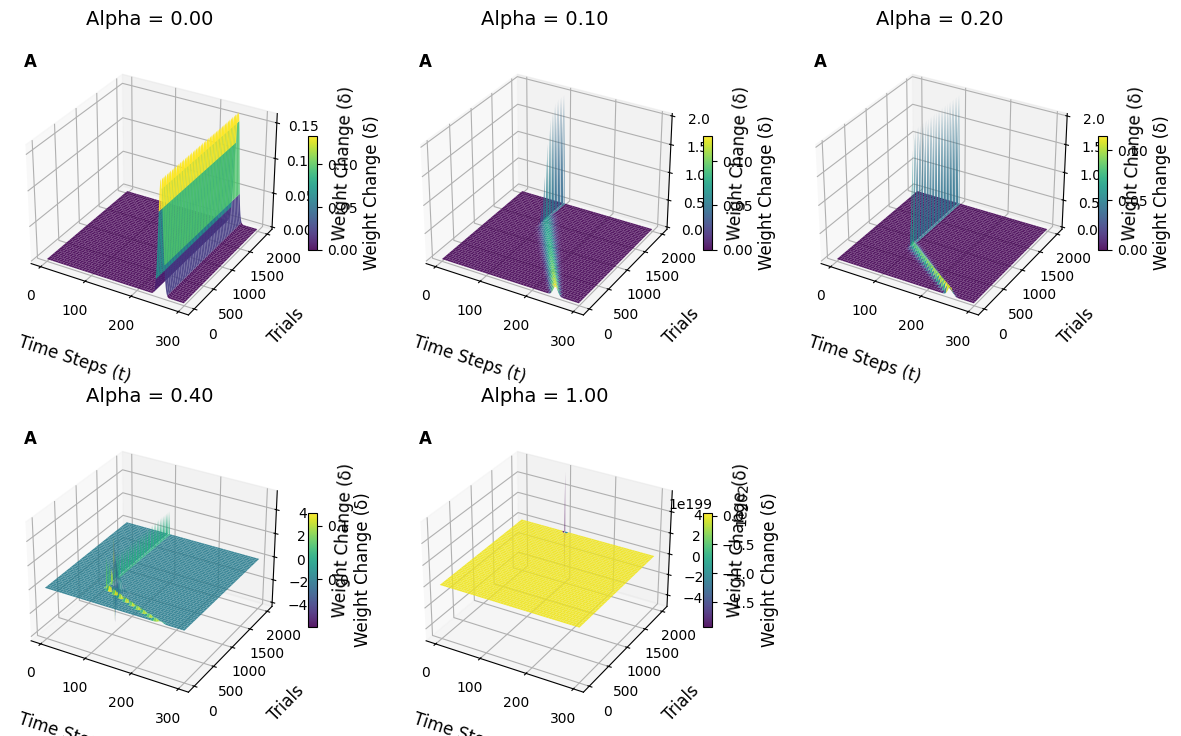

In [21]:
#plot 3d figure for diffrent learning rates

# Define the array of alpha values to plot (from 0 to 1)
alpha_values = [0, 0.1, 0.2, 0.4, 1]  # Choose 5 values for alpha between 0 and 1

# Assuming td_leaning function and other necessary variables (u, r, trials, steps) are defined elsewhere

# Initialize the figure
fig_a = plt.figure(figsize=(12, 8))  # Adjust size for better readability

# Plot 3D surface for each alpha value in alpha_values
for idx, alpha in enumerate(alpha_values):
    # Compute the learning results for the current alpha value
    w, v, delta_v, delta_after = td_leaning(alpha, u, r, trials, steps)  # Assuming td_leaning returns delta_after
    
    # Create mesh grid for plotting based on the shape of delta_after
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))
    
    # Create a new subplot for each alpha value (using 2 rows and 3 columns)
    ax1 = fig_a.add_subplot(2, 3, idx+1, projection='3d')  # 2 rows, 3 columns

    # Plotting with the 'viridis' colormap
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

    # Labels and formatting
    ax1.set_xlabel('Time Steps (t)', fontsize=12, labelpad=15)
    ax1.set_ylabel('Trials', fontsize=12, labelpad=15)
    ax1.set_zlabel('Weight Change (δ)', fontsize=12, labelpad=10)

    # Add colorbar for color mapping with a smaller size
    cbar = fig_a.colorbar(surf, ax=ax1, shrink=0.3, aspect=12)  # Shrink and aspect ratio adjusted for smaller colorbar
    cbar.set_label('Weight Change (δ)', fontsize=12)  # Added label

    # Title and annotation
    ax1.set_title(f'Alpha = {alpha:.2f}', fontsize=14, pad=20)
    ax1.text2D(0.05, 0.95, "A", transform=ax1.transAxes, fontsize=12, fontweight='bold')  # Adjusted positioning

    # Adjust view to center the plot
    ax1.view_init(elev=30, azim=-60)  # Elevation and azimuth for a centered view

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()  
plt.show()


For smaller values of the learning rate smaller weight change updates will be seen, leading to smaller TD errors and a more gradual learning.

For larger values of alpha, larger weight updtades will be seen. This can lead to instability, causing the learning process to overshoot or oscillate, leading to erratic weight changes. This can make the learning unstable, where the model continuously adjusts weights too much, often leading to large and inconsistent TD errors.

C. Multiple rewards

C:\Users\34600\AppData\Local\Temp\ipykernel_20340\4283202099.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


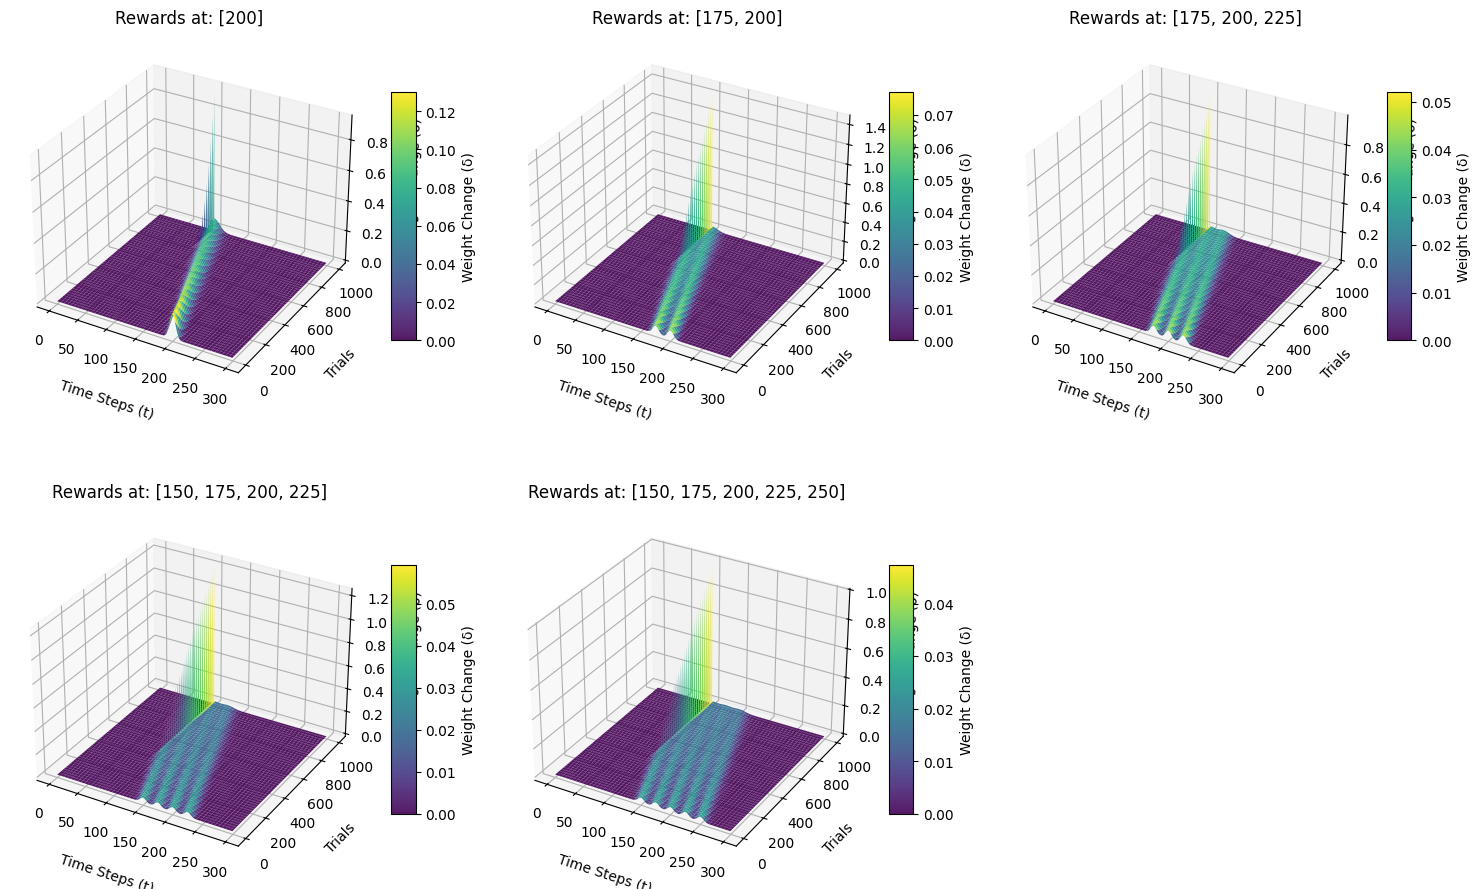

In [22]:
# Implementation of multiple rewards

# Define reward scenarios with 1 to 5 rewards per trial
reward_scenarios = [
    [200],                # Single reward
    [175, 200],           # Two rewards
    [175, 200, 225],      # Three rewards
    [150, 175, 200, 225], # Four rewards
    [150, 175, 200, 225, 250] # Five rewards
]

# Define constants
sigma = 5  # Standard deviation for Gaussian
trials = 1000  # Number of trials

# Initialize the figure for multiple subplots
fig_r = plt.figure(figsize=(15, 10))

# Loop through reward scenarios and plot results
for idx, reward_times in enumerate(reward_scenarios):
    # Initialize rewards array
    r = np.zeros(len(time_steps))
    
    # Add Gaussian rewards for each reward time
    for reward_time in reward_times:
        single_r = np.zeros(len(time_steps))
        single_r[reward_time] = 1
        single_r = gaussian_filter1d(single_r, sigma)
        r += single_r  # Add the Gaussian reward
    
    # Normalize to ensure total integral = 2
    r *= 2 / np.sum(r)
    
    # Run the TD learning function (assuming td_learning is defined elsewhere)
    w, v, delta_v, delta_after = td_leaning(learning_rate, u, r, trials, steps)  
    
    # Create mesh grid for plotting based on delta_after dimensions
    x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

    # Add a 3D subplot for the current reward scenario
    ax1 = fig_r.add_subplot(2, 3, idx+1, projection='3d')  # Adjust to fit all plots

    # Plot the surface
    surf = ax1.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

    # Customize labels and appearance
    ax1.set_xlabel('Time Steps (t)', fontsize=10, labelpad=10)
    ax1.set_ylabel('Trials', fontsize=10, labelpad=10)
    ax1.set_zlabel('Weight Change (δ)', fontsize=10, labelpad=8)
    ax1.set_title(f'Rewards at: {reward_times}', fontsize=12, pad=10)
    ax1.view_init(elev=30, azim=-60)  # Adjust view angle

    # Add a colorbar
    cbar = fig_r.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
    cbar.set_label('Weight Change (δ)', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In TD learning, earlier rewards (or stimuli) typically contribute more strongly to learning because they occur closer to the current prediction error update.
Later rewards have a delayed influence and are indirectly "discounted" over time as the weight updates propagate backward through time steps.

D. Stochastic rewards

C:\Users\34600\AppData\Local\Temp\ipykernel_20340\2466496053.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[tau] += alpha * delta[n, t] * stimuli[t - tau]


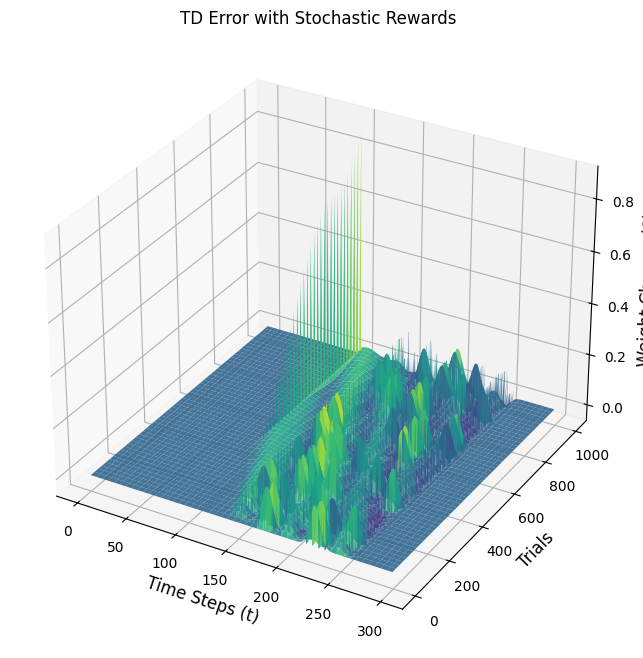

In [23]:
# Define parameters for stochastic reward times
trials = 1000
reward_times_array = [150, 175, 200, 225, 250]  # Possible reward times


# Generate trial-specific rewards
rewards = np.zeros((trials, steps))  # Initialize 2D array for trial x time step

# Assign a stochastic reward time for each trial
np.random.seed(42)  # For reproducibility
stochastic_reward_times = np.random.choice(reward_times_array, size=trials)

# Create the reward signals
for n in range(trials):
    reward_time = stochastic_reward_times[n]
    r = np.zeros(steps)
    r[reward_time] = 1  # Reward at the stochastic time step
    r = gaussian_filter1d(r, sigma)  # Apply Gaussian filter
    r *= 2 / np.sum(r)  # Normalize to sum to 2
    rewards[n, :] = r  # Assign to the trial-specific rewards array

# Update td_learning to td_learning_stochastic to accept r as a 2D array

def td_leaning_stochastic(alpha, stimuli, rewards, trials, steps):
    """
    Temporal Difference learning 

    Args:
        alpha (float): Learning rate (0 <= alpha <= 1).
        stimuli (array): Input stimuli signal
        rewards (2D array): Reward signals (trials x time steps)
        trials (int): Number of trials
        steps (int): Number of time points
    
    Returns:
        w (array): Weights (associations between stimuli and predictions) after learning.
        v (array): Prediction of reward
        delta_v (array): Change in predictions between consecutive time steps.
        delta (2D array): Temporal Difference (TD) errors across trials and time steps.
    """
    # Initialize arrays
    w = np.zeros(steps)  # Weights
    v = np.zeros(steps)  # Prediction
    delta = np.zeros((trials, steps))  # TD errors (trials x time steps)
    delta_v = np.zeros(steps)  # Change in predictions

    # TD learning: update predictions for each trial
    for n in range(trials):  # Iterate over trials
        for t in range(1, steps):  # Iterate over time steps
            # Compute prediction v(t) as the weighted sum of past stimuli
            v[t] = (w[0:t] @ stimuli[t:0:-1])[0]

            # Compute prediction difference
            delta_v[t - 1] = v[t] - v[t - 1]

            # Compute TD error for this trial and time step
            delta[n, t] = rewards[n, t] + delta_v[t]

            # Update weights
            for tau in range(t):
                w[tau] += alpha * delta[n, t] * stimuli[t - tau]

    return w, v, delta_v, delta



# Run TD learning with stochastic rewards
w, v, delta_v, delta_after = td_leaning_stochastic(learning_rate, u, rewards, trials, steps)

# Plot as before
fig = plt.figure(figsize=(12, 8))
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Plot the surface
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, delta_after, cmap='viridis', edgecolor='none', alpha=0.9)

# Format plot
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Trials', fontsize=12)
ax.set_zlabel('Weight Change (δ)', fontsize=12)
plt.title('TD Error with Stochastic Rewards')
plt.show()
